# Notebook #3: Cross Validation with kNN and Wine Ratings
**Riley Rongere**


For this notebook, you're going to work with a k-NN function for predicting the 'quality' of white wine 🍷 . The white wine quality data set has a 'quality' column (a range from 0 to 10) and will serve the target feature we are trying to predict. The data has the following predictor columns:

* fixed acidity
* volatile acidit
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

You do not need to know what any of the above means; it is sufficient to know that they are all numeric values that measure some aspect of a wine. The dataset consists of 1599 training examples. The goal of this assignment is to use cross-validation in the kNN model to determine the optimal use of k in the algorithm for predicting wine quality. This will required the use of independent training and test subsets of the data.

For an example of this using the Iris dataset or the Penguin dataset to help solve similar problems, see the notes from Lecture 7 and Lecture 8, (or this GitHub repository)

What you need to do:
Don't forget that you are doing regression -- pay attention that the implementation to kNN uses the average 'quality' of the top k training examples.
Make sure to implement an appropriate regression metric - you should use mean squared error for this assignment.

Make sure your variables and functions and graph labels/titles all have reasonable names. I will deduct points if variables/functions are named things such as "iris" or "classification" (as this is a regression problem).

1. Implement mean squared error (mse) algorithm and test it (make sure if you pass in two lists that are identical, it should output 0).
def mse(actual,predicted):

2. Split your data into testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. Feel free to use fewer examples in your testing set -- particularly if it takes a long time to run on your computer (e.g. more than 30 seconds). Use the rest of the data as your training set.

3. Use the kNN implementation and the other code provided to normalize your data. Run your model (using the normalized data) with several different values of k and graphically show the results using your implementation of mse from step #1.

4. Repeat the experiment and graphically show the results using r^2.

5. Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? Explain why. Use a markdown cell to explain your conclusions.

Prepare the data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change the path so to access the data on your drive 
wine_data = pd.read_csv('/content/drive/MyDrive/CS167-Machine_Learning/datasets/winequality-white.csv')
wine_data.shape

(1599, 12)

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [ ]:
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the mean squared error between the actual and predicted values

    mean_squared_error = np.square(actual-predicted).mean()

    return mean_squared_error

# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [ ]:
# change the path so to access the data on your drive 
wine_data = pd.read_csv('/content/drive/MyDrive/CS167-Machine_Learning/datasets/winequality-white.csv')

# establish test_data and train_data here
shuffled_data = wine_data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [ ]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [ ]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [ ]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()

In [ ]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

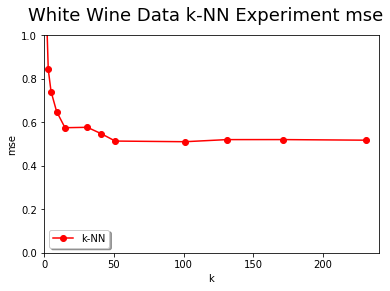

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

k_vals = [1,3,5,9,15,31,41,51,101,131,171,231] #1599 rows in training set
kNN_mse = []

for k in k_vals:
    predictions = regressions_all_kNN(test_data,train_data,k)
    current_mse = mse(test_data['quality'],predictions)
    kNN_mse.append(current_mse)


plt.suptitle('White Wine Data k-NN Experiment mse',fontsize=18)
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(k_vals,kNN_mse,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,240,0,1])

plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

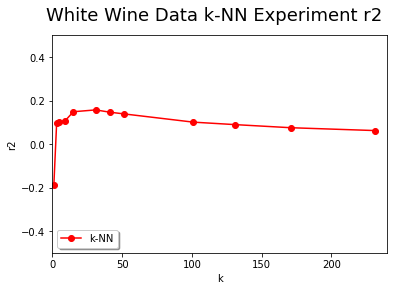

In [58]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

k_vals = [1,3,5,9,15,31,41,51,101,131,171,231] #1599 rows in training set
kNN_r2 = []

for k in k_vals:
    prediction = regressions_all_kNN(test_data,train_data,k)
    actual = test_data['quality']
    current_r2 = r2_score(actual,prediction)
    kNN_r2.append(current_r2)

plt.suptitle('White Wine Data k-NN Experiment r2',fontsize=18)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,240,-.5,.5])

plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

The best number for k for the k-NN algorith for this set is 51. When k is 51, mse is at it's lowest meaning that according to this alalytic, the algorithm performs the best with k as 51. Further, acording r2, while 51 does not provide the best result, it provides a resut that is very close to the best according to this statistic. The combination of these two values is what gives the best value for k.